### Develop LSTM Models For Univariate Time Series Forecasting

In [48]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [92]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [93]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [94]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [96]:
X.shape

(6, 3, 1)

In [95]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [98]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Train on 6 samples
Epoch 1/300
6/6 [==============================] - 4s 630ms/sample - loss: 28792.3184
Epoch 2/300
6/6 [==============================] - 0s 2ms/sample - loss: 28158.4785
Epoch 3/300
6/6 [==============================] - 0s 2ms/sample - loss: 27535.7031
Epoch 4/300
6/6 [==============================] - 0s 2ms/sample - loss: 26879.9277
Epoch 5/300
6/6 [==============================] - 0s 2ms/sample - loss: 26205.4238
Epoch 6/300
6/6 [==============================] - 0s 2ms/sample - loss: 25542.6230
Epoch 7/300
6/6 [==============================] - 0s 2ms/sample - loss: 24897.1934
Epoch 8/300
6/6 [==============================] - 0s 2ms/sample - loss: 24219.8691
Epoch 9/300
6/6 [==============================] - 0s 2ms/sample - loss: 23500.6191
Epoch 10/300
6/6 [==============================] - 0s 2ms/sample - loss: 22745.9512
Epoch 11/300
6/6 [==============================] - 0s 2ms/sample - loss: 21970.0059
Epoch 12/300
6/6 [==============================] - 0

Epoch 100/300
6/6 [==============================] - 0s 3ms/sample - loss: 5.2086
Epoch 101/300
6/6 [==============================] - 0s 3ms/sample - loss: 2.9660
Epoch 102/300
6/6 [==============================] - 0s 3ms/sample - loss: 4.4694
Epoch 103/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.3676
Epoch 104/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.7143
Epoch 105/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.6114
Epoch 106/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.1115
Epoch 107/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.7512
Epoch 108/300
6/6 [==============================] - 0s 3ms/sample - loss: 2.9237
Epoch 109/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.4108
Epoch 110/300
6/6 [==============================] - 0s 3ms/sample - loss: 3.1767
Epoch 111/300
6/6 [==============================] - 0s 3ms/sample - loss: 2.9337
Epoch 112/300
6/

Epoch 200/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.0562
Epoch 201/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.0545
Epoch 202/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.0880
Epoch 203/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.1988
Epoch 204/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.4486
Epoch 205/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.2860
Epoch 206/300
6/6 [==============================] - 0s 2ms/sample - loss: 1.9903
Epoch 207/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.1246
Epoch 208/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.2679
Epoch 209/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.0778
Epoch 210/300
6/6 [==============================] - 0s 2ms/sample - loss: 1.9488
Epoch 211/300
6/6 [==============================] - 0s 2ms/sample - loss: 2.1291
Epoch 212/300
6/

Epoch 300/300
6/6 [==============================] - 0s 2ms/sample - loss: 0.2984


### Predicting For the next 10 data

In [100]:
# demonstrate prediction for next 10 days
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.60294]
1 day input [196.         210.         222.60293579]
1 day output [[233.8742]]
2 day input [210.         222.60293579 233.87420654]
2 day output [[247.27202]]
3 day input [222.60294 233.8742  247.27202]
3 day output [[259.5402]]
4 day input [233.8742  247.27202 259.5402 ]
4 day output [[271.7569]]
5 day input [247.27202 259.5402  271.7569 ]
5 day output [[284.67233]]
6 day input [259.5402  271.7569  284.67233]
6 day output [[297.0426]]
7 day input [271.7569  284.67233 297.0426 ]
7 day output [[309.54495]]
8 day input [284.67233 297.0426  309.54495]
8 day output [[322.2181]]
9 day input [297.0426  309.54495 322.2181 ]
9 day output [[334.66574]]
[222.60294, 233.8742, 247.27202, 259.5402, 271.7569, 284.67233, 297.0426, 309.54495, 322.2181, 334.66574]


In [101]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [102]:
len(timeseries_data)

9

In [84]:
lst_output

[207.60309,
 219.40913,
 232.47244,
 249.33023,
 263.42752,
 279.1716,
 296.92273,
 313.7915,
 332.32684,
 352.21432]

In [75]:
lst

[170, 180, 190]

### Visualizaing The Output

In [38]:
import matplotlib.pyplot as plt

In [89]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

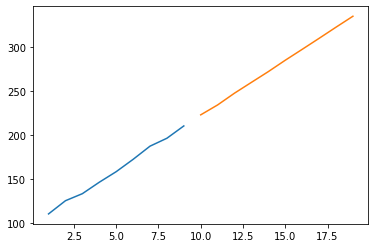

In [103]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
